In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalAveragePooling1D
from sklearn.metrics import classification_report
import os
import random
import re

In [3]:
import tarfile
import urllib.request

In [4]:
import tarfile
import urllib.request

In [5]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
filename = "aclImdb_v1.tar.gz"
if not os.path.exists("aclImdb"):
    urllib.request.urlretrieve(url, filename)
    with tarfile.open(filename, "r:gz") as tar:
        tar.extractall()

In [6]:
def load_imdb_data(directory):
    data = []
    labels = []
    for label_type in ['pos', 'neg']:
        folder = os.path.join(directory, label_type)
        for fname in os.listdir(folder):
            if fname.endswith('.txt'):
                with open(os.path.join(folder, fname), encoding="utf-8") as f:
                    data.append(f.read())
                    labels.append(1 if label_type == 'pos' else 0)
    return data, labels

train_texts, train_labels = load_imdb_data("aclImdb/train")
test_texts, test_labels = load_imdb_data("aclImdb/test")

In [7]:
combined = list(zip(train_texts, train_labels))
random.shuffle(combined)
train_texts, train_labels = zip(*combined)


In [13]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)
X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

In [14]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [15]:
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [16]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=128)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 76s 460ms/step - accuracy: 0.5200 - loss: 0.6914 - val_accuracy: 0.5670 - val_loss: 0.6721
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 76s 429ms/step - accuracy: 0.6214 - loss: 0.6529 - val_accuracy: 0.7568 - val_loss: 0.5366
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 399ms/step - accuracy: 0.6885 - loss: 0.6105 - val_accuracy: 0.5832 - val_loss: 0.6547


In [17]:
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f"\nLSTM Test Accuracy: {accuracy:.4f}")
y_pred = (model_lstm.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7005 - loss: 0.6619

LSTM Test Accuracy: 0.5780
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step
              precision    recall  f1-score   support

           0       0.62      0.40      0.48     12500
           1       0.56      0.76      0.64     12500

    accuracy                           0.58     25000
   macro avg       0.59      0.58      0.56     25000
weighted avg       0.59      0.58      0.56     25000



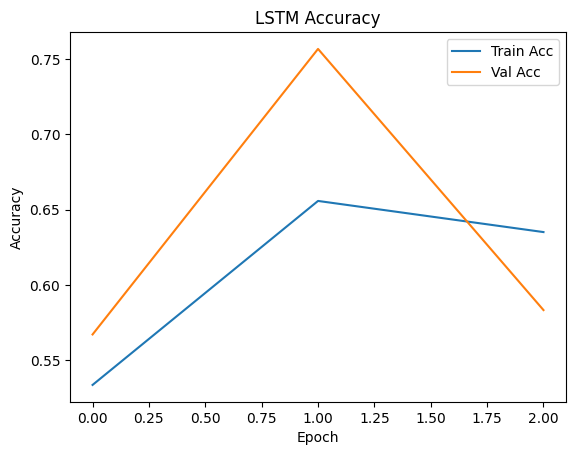

In [18]:
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title('LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()